.

EXP 6

.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 171s 359ms/step - loss: 0.3653 - val_loss: 0.3062
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 192s 340ms/step - loss: 0.3032 - val_loss: 0.3023
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 345ms/step - loss: 0.2980 - val_loss: 0.2996
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 339ms/step - loss: 0.2963 - val_loss: 0.2965
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 202s 339ms/step - loss: 0.2933 - val_loss: 0.2950
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 162s 345ms/step - loss: 0.2925 - val_loss: 0.2941
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 338ms/step - loss: 0.2912 - val_loss: 0.2932
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 201s 336ms/step - loss: 0.2905 - val_loss: 0.2924
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 159s 338ms/step - loss: 0.2895 - val_loss: 0.2917
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 158s 337ms/step - loss: 0.2890 - val_loss: 0.2914
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


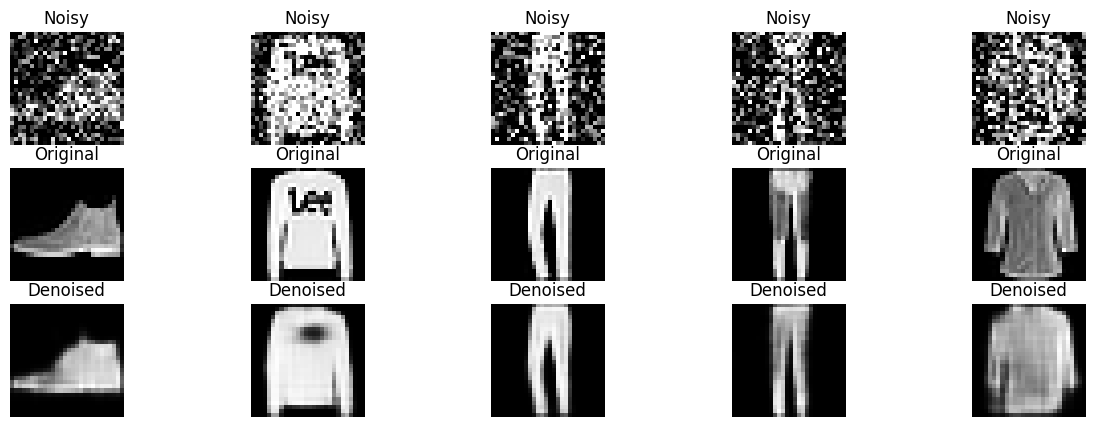

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

# 1. Load Dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Reshape to add channel dimension
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# 2. Add Noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# 3. Build Stacked Autoencoder Model
input_img = Input(shape=(28, 28, 1))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

# Model
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

autoencoder.summary()

# 4. Train Model
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=10,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# 5. Predict Denoised Images
decoded_imgs = autoencoder.predict(x_test_noisy)

# 6. Visualization
n = 5
plt.figure(figsize=(15,5))

for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
    plt.title("Noisy")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title("Original")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28,28), cmap='gray')
    plt.title("Denoised")
    plt.axis("off")

plt.show()
